# Applying Regression

Now that we have derived the solution to linear regerssion, let's apply it to some problems.

*Warning*: Here I will be taking the inverse of $X^\top X$ to simplify code. In practice, you should take more percaution as $X^\top X$ isn't garunteed to be invertible.

We'll start by writing a simple function that returns the least squares estimate.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def least_sq(X, y):
    if len(X.shape) == 1: # 1D case, no need for matrix inverse
        psuedo_inv = 1 / (X.T @ X) * X.T
    else:
        psuedo_inv = np.linalg.inv(X.T @ X) @ X.T
    return psuedo_inv @ y

num_pts = 100

## Linear Problems
Let's first start by generating some multi-dimensional linear data according to our assumed guassian model.

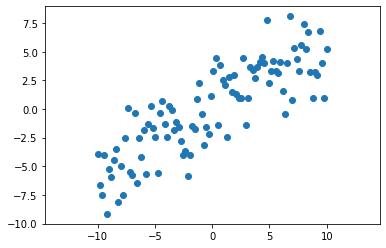

In [2]:
X = np.linspace(-10, 10, num_pts)
y = 0.6 * X + np.random.normal(0, 2, num_pts)
plt.scatter(X, y)
plt.axis('equal')
plt.show()

We can solve for the line of best fit by applying the least squares solution.

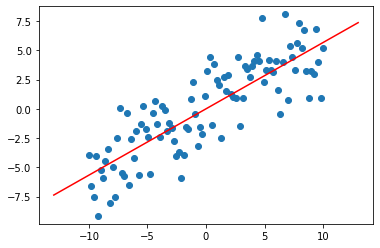

In [3]:
theta = least_sq(X, y)
linex = np.linspace(-13, 13, 10)
liney = linex * theta
plt.scatter(X, y)
plt.plot(linex, liney, 'r')
plt.axis('equal')
plt.show()

We did pretty well! Let;s try another dataset and see what happens.

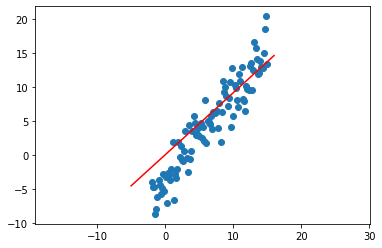

In [4]:
X = np.linspace(-2, 15, num_pts)
y = 1.3 * (X - 3) + np.random.normal(0, 2, num_pts)
theta = least_sq(X, y)
linex = np.linspace(-5, 16, 10)
liney = linex * theta
plt.scatter(X, y)
plt.plot(linex, liney, 'r')
plt.axis('equal')
plt.show()

Uh oh! It looks like our least square estimate didn't do very well here, yet we proved that it was optimal. The problem doesn't lie with the solution we came up with, it instead lies in how we modeled the data. In the previous parts, our model was as follows.

$$ Y = X^\top \theta + \epsilon$$

Here $X, Y$ represent the underlying random variables not matrices. Ignoring the errors, this equation looks a bit lacking in comparison to the lines you perhaps used in algebra. Thats because it's missing a bias term $b$. The model we have been using makes the often untrue assumption that the correct linear model passes directly through the origin as if $x_i = 0$, then $x_i^\top \theta = 0$. We could fix this by adding another learned bias $b$ and re-doing all of our previous work, but there's a more clever solution. $X^\top \theta = X_1 \theta_1 + \dots + X_k \theta_k$. We can add a bias by extending each data point to include a one, so the underlying model becomes $X_1 \theta_1 + \dots + X_k \theta_k + 1 \times \theta_{k+1}$. Now $\theta_{k+1}$ encodes the bias! In practice, we do this by simply appending a one to every single data point. See the example below:

Example data point:  [-2.  1.]


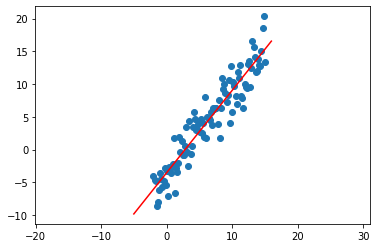

In [8]:
X_add = np.vstack((X, np.ones(len(X)))).T
print("Example data point: ", X_add[0])
theta = least_sq(X_add, y)
linex = np.linspace(-5, 16, 10)
linex = np.vstack((linex, np.ones(len(linex)))).T # add dimension to linex as well
liney = linex @ theta
plt.scatter(X, y)
plt.plot(linex[:,0], liney, 'r')
plt.axis('equal')
plt.show()

## Non-Linear Problems

What you just observed is that we were able to add extra *features* to our data in order to allow the simple linear model to express more complex data. We can in fact extend this beyond linear data. Let's see how.

First, here's some generated data and the associated least squares estimate (with bias!)

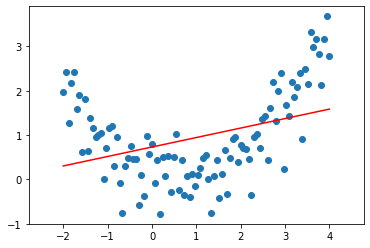

In [13]:
X = np.linspace(-2, 4, num_pts)
y = 0.3 * np.square(X) - 0.4 * X + 0.1  + np.random.normal(0, 0.5, 100)
X_add = np.vstack((X, np.ones(len(X)))).T
theta = least_sq(X_add, y)
linex = np.linspace(-2, 4, 10)
linex = np.vstack((linex, np.ones(len(linex)))).T
liney = linex @ theta
plt.scatter(X, y)
plt.plot(linex[:,0], liney, 'r')
plt.axis('equal')
plt.show()

Even with the bias added, this still does not look like a very good approximation of the data. In fact, here the data looks quadratic. We know that a quadratic function is given by $y = ax^2 + bx + c$. Let's change our model to fit that! We can thus add quadratic features by appending to the data matrix, allowing our model to better fit the data. Now, $X^\top \theta = \theta_1 X^2 + \theta_2 X + \theta_3$. Let's see this in code:

Data matrix shape (100, 3)
Example data point: [ 4. -2.  1.]


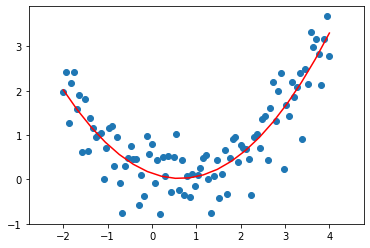

In [14]:
X_quad = np.vstack((np.square(X), X, np.ones(len(X)))).T
print("Data matrix shape", X_quad.shape)
print("Example data point:", X_quad[0])
theta = least_sq(X_quad, y)
linex = np.linspace(-2, 4, 20)
linex = np.vstack((np.square(linex), linex, np.ones(len(linex)))).T # Add quadratic features to line x
liney = linex @ theta
plt.scatter(X, y)
plt.plot(linex[:,1], liney, 'r')
plt.axis('equal')
plt.show()

By adding quadratic features to the data, we were able to model quadratic functions! This means that although we started with a simple linear model, by adding non-linear features we can actually use linear regression for very complicated relationships.